In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Q1

In [2]:
imagenet_path = "../n02106662"

In [3]:
img_filename = np.random.choice(os.listdir(imagenet_path)) # randomly choosing an image file

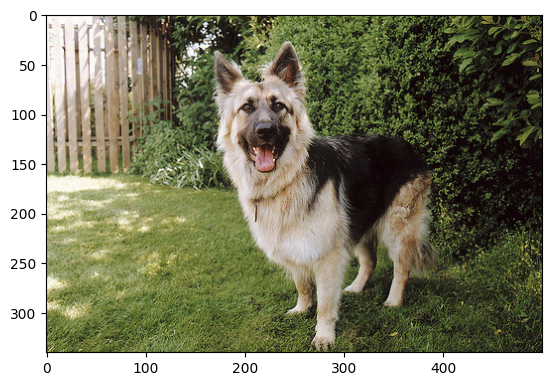

(340, 500, 3)

In [4]:
img = cv2.imread(os.path.join(imagenet_path, img_filename), cv2.IMREAD_ANYCOLOR)
plt.imshow(img[:, :, ::-1]) # bgr to rgb
plt.show()
img.shape

In [5]:
img = cv2.resize(img, (256, 256))

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

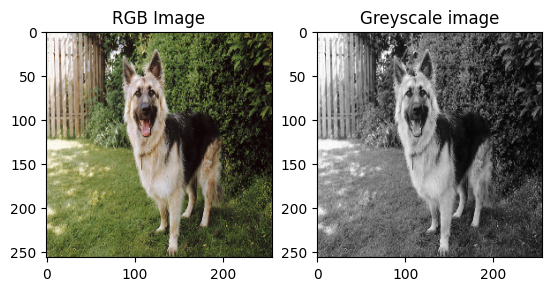

In [7]:
plt.subplot(1,2,1)
plt.title("RGB Image")
plt.imshow(img_rgb)

plt.subplot(1,2,2)
plt.title("Greyscale image")
plt.imshow(img_grey, cmap='gray')
plt.show()


In [8]:
print(img_filename)
plt.imsave(img_filename.replace("JPEG", "JPG"), img_grey, cmap='gray')

n02106662_25832.JPEG


In [9]:
img_hflip = np.zeros_like(img_rgb)
img_vflip = np.zeros_like(img_rgb)
height, width, _ = img_rgb.shape

for i in range(height):
    for j in range(width):
        img_vflip[height-i-1,j] = img_rgb[i, j]

for i in range(height):
    for j in range(width):
        img_hflip[i,width-j-1] = img_rgb[i, j]

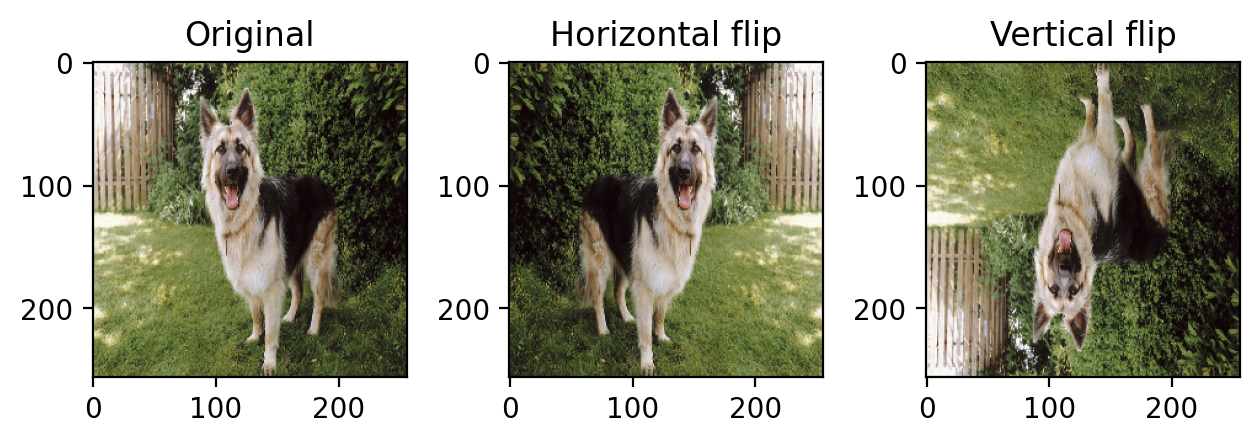

In [10]:
plt.figure(dpi=200)
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img_rgb)

plt.subplot(1,3,2)
plt.title("Horizontal flip")
plt.imshow(img_hflip)

plt.subplot(1,3,3)
plt.title("Vertical flip")
plt.imshow(img_vflip)

plt.tight_layout()
plt.show()

In [11]:
crop_size = 128, 128
rand_x = np.random.randint(0, height-crop_size[0])
rand_y = np.random.randint(0, width-crop_size[1])

crop = img_rgb[rand_y:rand_y+crop_size[1], rand_x:rand_x+crop_size[0]]

In [12]:
crop_resize = cv2.resize(crop, (256, 256))

In [13]:
x1, y1 = rand_x, rand_y
x2, y2 = rand_x+crop_size[0], rand_y+crop_size[1]
img_rgb = cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=1)
img_rgb = cv2.circle(img_rgb, center=((x1+x2)//2, (y1+y2)//2), radius=3, color=(255, 0, 0), thickness=-1)
# the coordinate system is different from the traditional system

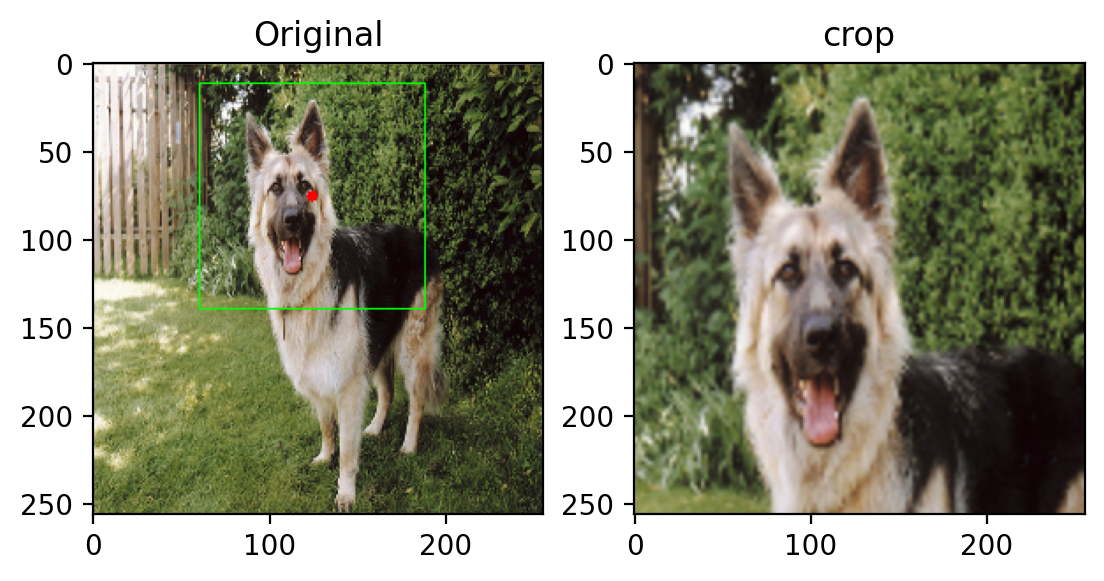

In [14]:
plt.figure(dpi=200)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_rgb)

plt.subplot(1,2,2)
plt.title("crop")
plt.imshow(crop_resize)

plt.show()

# Q2

In [15]:
video_path = "/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/person15_boxing_d1_uncomp.avi"

In [16]:
def extract_k_frames(video_path, k, resize_shape=None):
    if resize_shape==None:
        resize_shape=(256, 256)
    vid_capture = cv2.VideoCapture(video_path)
    fps = vid_capture.get(cv2.CAP_PROP_FPS)
    print('Frames per second : ', fps,'FPS')
    frame_count = vid_capture.get(cv2.CAP_PROP_FRAME_COUNT)
    print('Frame count : ', frame_count)

    frame_counter = 0
    print(f"Extracting every {k}-frames...")
    video_path = video_path.replace(".avi", "")
    video_path = video_path.replace(".mvi", "")
    video_path = video_path.replace(".mp4", "")


    os.makedirs(video_path, exist_ok=True)
    while(vid_capture.isOpened()==True):
        ret, frame = vid_capture.read()
        if ret == True:
            frame = cv2.resize(frame, resize_shape)
            cv2.imwrite(os.path.join(video_path, str(frame_counter)+".jpg"), frame)
        else:
            break
        for _ in range(k-1): # skiping frames
            ret, frame = vid_capture.read()
            frame_counter += 1

    # Release the video ca|pture object
    vid_capture.release()
    print("Extraction done!")

In [17]:
extract_k_frames(video_path, 10)

Frames per second :  25.0 FPS
Frame count :  408.0
Extracting every 10-frames...
Extraction done!


# Q3

In [18]:
train_image = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/train-images-idx3-ubyte'
train_label = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/train-labels-idx1-ubyte'
test_image = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/t10k-images-idx3-ubyte'
test_label = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/t10k-labels-idx1-ubyte'

In [19]:
# from mnist_get_data import extract_mnist # this is custom function for extracting mnist images and labesl from ubyte files
def extract_mnist(image_f, label_f):
	'''
	This function is used to extract image files and the corresponding labels from ubyte format and save them in seperate directory.
	Source: https://gist.github.com/fukuroder/caa351677bf718a8bfe6265c2a45211f
	P.S. - The source of the code is not working due to some bugs. This function has modifications to work as per my liking.
	Parameters:
	image_f - full-path to the uncompressed images file
	labels_f - full-path to the uncompressed labels file

	Returns: 
	None
	'''
	with open(image_f, 'rb') as f:
		images = f.read()
	with open(label_f, 'rb') as f:
		labels = f.read()
	
	images = [d for d in images[16:]]
	images = np.array(images, dtype=np.uint8)
	images = images.reshape((-1,28,28))
	
	outdir = image_f + "_folder"
	if not os.path.exists(outdir):
		os.mkdir(outdir)
	for k,image in enumerate(images):
		cv2.imwrite(os.path.join(outdir, '%05d.png' % (k,)), image)
	
	labels = ['%05d.png %d' % (k, l) for k,l in enumerate(labels[8:])]
	with open('%s.txt' % label_f, 'w') as f:
		f.write(os.linesep.join(labels))

In [20]:
for image_f, label_f in [(train_image, train_label), (test_image, test_label)]:
    extract_mnist(image_f, label_f)

In [21]:
train_img_path = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/train-images-idx3-ubyte_folder'
train_label_file = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/train-labels-idx1-ubyte.txt'
test_img_path = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/t10k-images-idx3-ubyte_folder'
test_label_file = '/Users/raunavghosh/Documents/Computer-vison/Computer-vision-EE511/t10k-labels-idx1-ubyte.txt'

In [22]:
def process_mnist(img_path, label_file):
    '''
    Takes in image_directory and label_file_path and returns np.array's
    '''
    with open(label_file, mode='r') as f:
        filelines = f.readlines()
    label_dic = {}
    for line in filelines:
        key, value = line.split(sep=" ")
        label_dic[key] = int(value.removesuffix('\n'))

    imgs = []
    labels = []

    for filename in os.listdir(img_path):
        img = cv2.imread(os.path.join(img_path, filename), cv2.IMREAD_ANYCOLOR)
        imgs.append(img)

        labels.append(label_dic[filename])
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

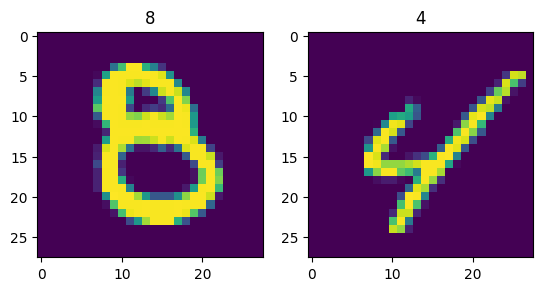

In [23]:
train_x, train_y = process_mnist(train_img_path, train_label_file)
test_x, test_y = process_mnist(test_img_path, test_label_file)
plt.subplot(1, 2, 1)
plt.imshow(train_x[0])
plt.title(train_y[0])

plt.subplot(1, 2, 2)
plt.imshow(test_x[0])
plt.title(test_y[0])

plt.show()

In [24]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
#Computing histogram from scratch just for fun
def compute_hist(dataset):
    hist_set = np.zeros((dataset.shape[0], 256), dtype=int)
    for i, img in enumerate(dataset):
        for pixel in img.reshape(-1):
            hist_set[i, pixel] += 1 
    return hist_set

In [26]:
train_hist = compute_hist(train_x)
test_hist = compute_hist(test_x)

In [27]:
train_hist.shape, test_hist.shape

((60000, 256), (10000, 256))

In [28]:
# np.savetxt('train.csv', train_hist)
# np.savetxt('test.csv', test_hist)
import csv
with open('train.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(train_hist)
with open('test.csv', mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(test_hist)

In [29]:
train_x.shape, test_x.shape, train_hist.shape, test_hist.shape

((60000, 28, 28), (10000, 28, 28), (60000, 256), (10000, 256))

In [30]:
train_hist.shape

(60000, 256)

In [31]:
def normalize(data):
    upper, lower = data.max(axis=0), data.min(axis=0) # lower and upper limit of each feature in the dataset
    data = (data - lower)/(upper - lower)
    return data

In [32]:
train_hist_n = normalize(train_hist)
test_hist_n = normalize(test_hist)

In [33]:
train_hist_n.shape

(60000, 256)

In [34]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE(n_components=2, verbose=2, random_state=10)
# z = tsne.fit_transform(train_x.reshape(-1, 28*28))
# z = tsne.fit_transform(train_hist_n)


In [36]:
import pickle
# with open('tsne_projection.pkl', mode='wb') as f:
#     pickle.dump(z, f, pickle.HIGHEST_PROTOCOL)
with open('tsne_projection.pkl', mode='rb') as f:
    z = pickle.load(f)

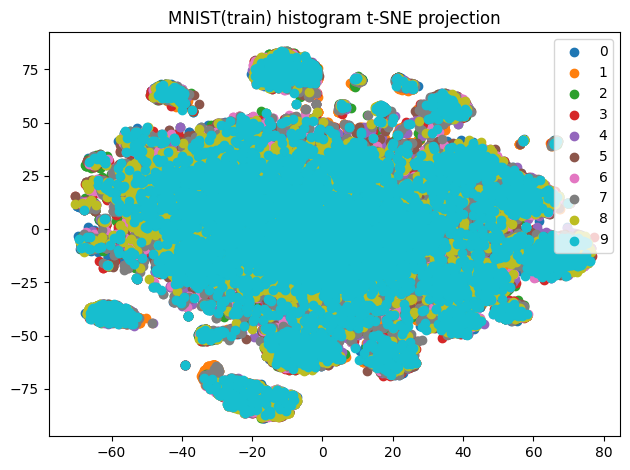

In [37]:
for label in range(0, 9+1):
    comp1 = [] 
    comp2 = []
    for i in range(len(train_y)):
        if label == train_y[i]:
            comp1.append(z[i, 0])
            comp2.append(z[i, 1])
    plt.scatter(comp1, comp2)
plt.legend(range(0, 9+1))
plt.title("MNIST(train) histogram t-SNE projection")
plt.tight_layout()
plt.show()

In [38]:
# import pandas as pd
# import seaborn as sns

# df = pd.DataFrame()
# df['y'] = train_y
# df['comp-1'] = z[:, 0]
# df['comp-2'] = z[:, 1]

# sns.scatterplot(x='comp-1', y='comp-2', hue=df.y.tolist(),data=df, palette=sns.color_palette('hls', 10)).set(title="MNIST(train) histogram t-SNE projection")


# Q4.

In [39]:
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
    
    def mean(self, x): # np.mean(X, axis = 0)  
        return np.sum(x, axis=0)/len(x) 

    def std(self, x): # np.std(X, axis = 0)
        return (np.sum([(i - self.mean(x))**2 for i in x], axis=0)/len(x))**0.5

    def Standardize_data(self, X):
        # return (X - self.mean(X))/self.std(X) # this is slower
        return (X - np.mean(X, axis=0))/np.std(X, axis=0) # this is faster

        
    def covariance(self, x): 
        return (x.T @ x)/(x.shape[0]-1)
    
    def fit(self, X):
        # Standardize data 
        print('Standardizing dataset...', end='')
        X = X.copy() # avoid altering the original dataset
        X_std = self.Standardize_data(X)
        print('Done!')
        
        # Eigendecomposition of covariance matrix
        print('Eigendecomposing dataset...', end='')       
        cov_mat = self.covariance(X_std)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        print('Done!')
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        print('Fitting... Done!')
        return self

    def transform(self, X):
        X = X.copy()
        X_std = self.Standardize_data(X)
        X_proj = X_std.dot(self.components.T)
        
        return X_proj

In [40]:
with open('train.csv', mode='r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    train_hist = np.zeros((60_000, 256), dtype=int)
    for i, row in enumerate(reader):
        row = np.array([int(x) for x in row])
        train_hist[i] = row
with open('test.csv', mode='r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    test_hist = np.zeros((60_000, 256), dtype=int)
    for i, row in enumerate(reader):
        row = np.array([int(x) for x in row])
        test_hist[i] = row

In [41]:
train_hist_n = normalize(train_hist)
test_hist_n = normalize(test_hist)

In [42]:
train_hist.shape

(60000, 256)

In [43]:
pca = MyPCA(n_components=2)
pca = pca.fit(train_hist)

Standardizing dataset...Done!
Eigendecomposing dataset...Done!
Fitting... Done!


In [44]:
pca1 = pca.transform(train_hist)
pca2 = pca.transform(test_hist)

In [45]:
def plot_pca(pca, train_y):
    for label in range(0, 9+1):
        comp1 = [] 
        comp2 = []
        for i in range(len(train_y)):
            if label == train_y[i]:
                comp1.append(pca[i, 0])
                comp2.append(pca[i, 1])
        plt.scatter(comp1, comp2)
    plt.legend(range(0, 9+1))  

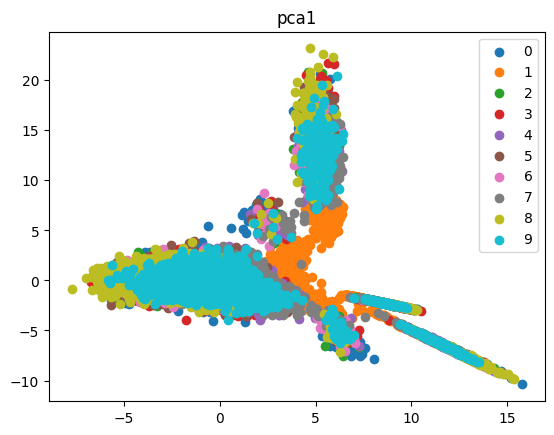

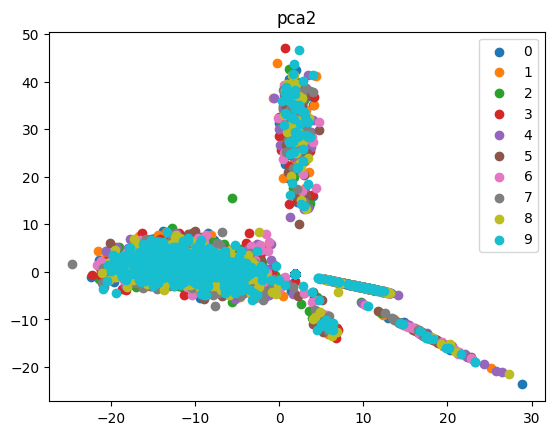

In [46]:
plt.figure(dpi=100)
# plt.subplot(1, 2, 1)
plot_pca(pca1, train_y)
plt.title('pca1')
plt.show()

plt.figure(dpi=100)
# plt.subplot(1, 2, 2)
plot_pca(pca2, train_y)
plt.title('pca2')
plt.show()